# Logistic Regression (MNIST)

We are going to use the MNIST dataset because it is for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. One of the things we will notice is that parameter tuning can greatly speed up and improve a machine learning algorithm. 

### Downloading the Data (MNIST)

In [1]:
from sklearn.datasets import load_digits
%matplotlib inline
# Change data_home to wherever to where you want to download your data
mnist = load_digits()

Now that you have the dataset loaded you can use the commands below

In [2]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


### Splitting Data into Training and Test Sets (MNIST)

In [3]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [4]:
print(train_img.shape)

(1540, 64)


In [5]:
print(train_lbl.shape)

(1540,)


In [6]:
print(test_img.shape)

(257, 64)


In [7]:
print(test_lbl.shape)

(257,)


### Showing the Images and Labels (MNIST)

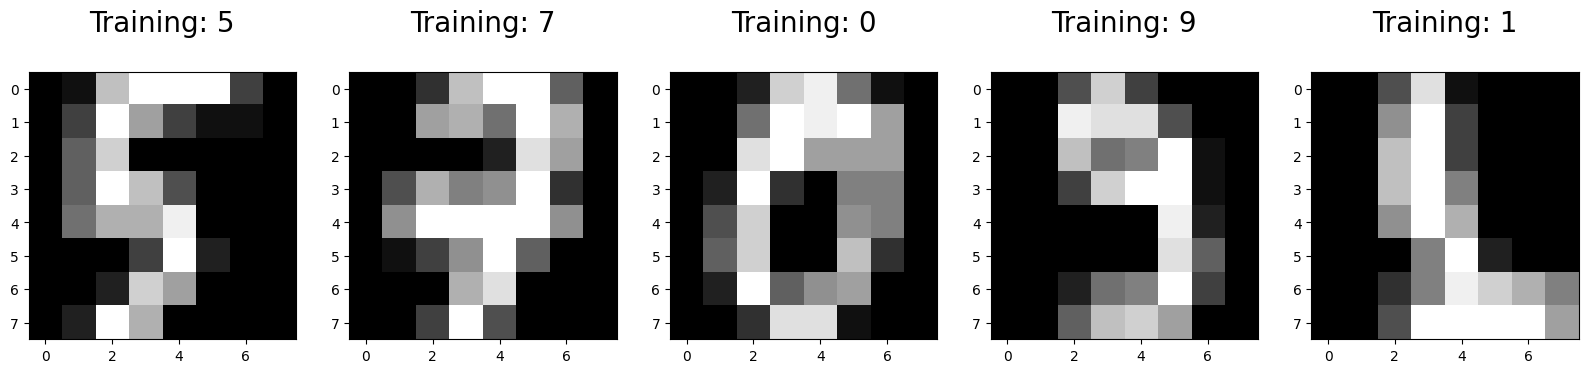

In [8]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Scikit-learn 4-Step Modeling Pattern (Digits Dataset)

**Step 1.** Import the model you want to use

In sklearn, all machine learning models are implemented as Python classes

In [9]:
from sklearn.linear_model import LogisticRegression

**Step 2.** Make an instance of the Model

In [10]:
logisticRegr = LogisticRegression()

**Step 3.** Training the model on the data, storing the information learned from the data

Model is learning the relationship between digits and labels

In [11]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Step 4.** Predict the labels of new data (new images)

Uses the information the model learned during the model training process

In [12]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([2])

In [13]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [14]:
# Make predictions on entire test data
predictions = logisticRegr.predict(test_img)

### Measuring Model Performance (MNIST)

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [15]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9688715953307393


### Display Misclassified images with Predicted Labels (MNIST)

In [16]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

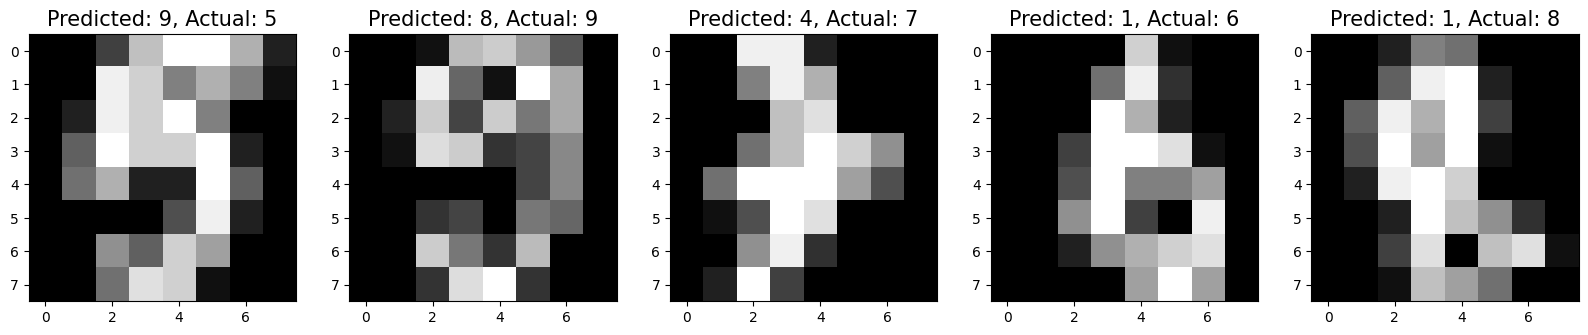

In [17]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (8,8)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
clf = SGDClassifier(loss="log_loss", penalty="l2")
clf.fit(train_img, train_lbl)

SGDClassifier(loss='log_loss')

In [20]:
y_pred = clf.predict(test_img)

In [21]:
score = clf.score(test_img, test_lbl)
print(score)    

0.9299610894941635


0.914396887159533
0.9455252918287937
0.9221789883268483


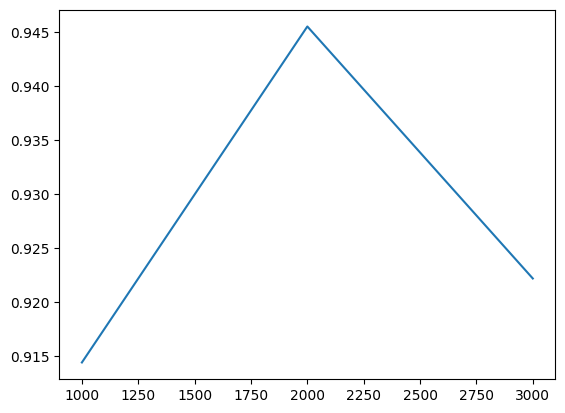

In [24]:

num_iter = [1000, 2000, 3000]
scores = []

for i in num_iter:

    clf = SGDClassifier(loss="log_loss", penalty="l2", max_iter=i)
    clf.fit(train_img, train_lbl)
    y_pred = clf.predict(test_img)
    score = clf.score(test_img, test_lbl)
    
    scores.append(score)
    print(score)    

plt.plot(num_iter, scores)